#Why Matplotlib
* Built on NumPy arrays (and python)

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


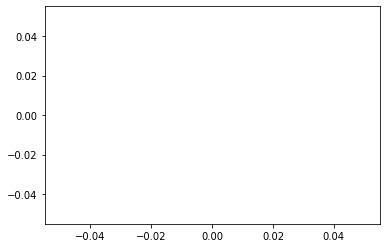

In [124]:
plt.plot(); # Creates empty plot ; = same thing as writing plt.show()

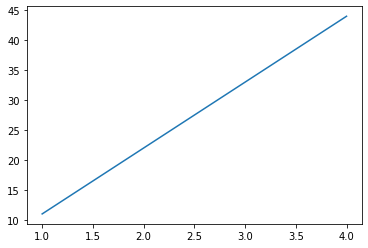

In [125]:
x = [1,2,3,4]
y=[11,22,33,44]
plt.plot(x,y);

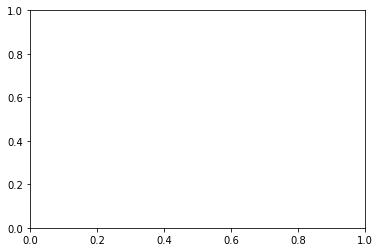

In [126]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot( ) # this adds some axis
plt.show()

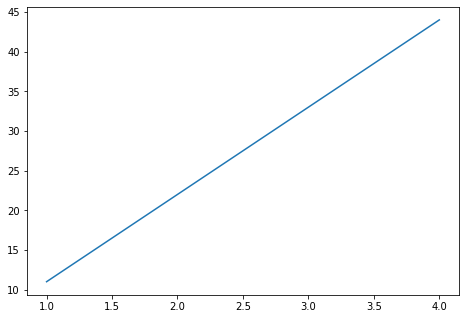

In [127]:
# 2nd method
fig = plt.figure( ) # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

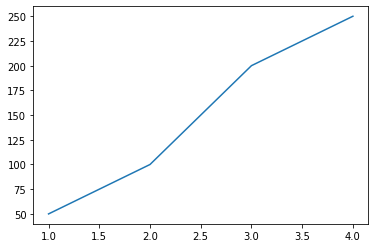

In [128]:
# 3rd method (recommended)
fig,ax = plt.subplots()
ax.plot(x,[50,100,200,250]); # Add some data

# Matplotlib example workflow

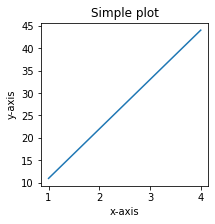

In [129]:
# 0. import matplotlib
import matplotlib.pyplot as plt

# 1. Prepare data
x=[1,2,3,4]
y=[11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(3,3))

#3. plot data
ax.plot(x,y)

#4. customise plot
ax.set(title="Simple plot",xlabel="x-axis",ylabel="y-axis")

plt.show()


# Making figure with NumPy arrays
we want:
* line plot
* bar plot
* scatter plot
* hist plot
* subplot

In [130]:
# Create some data
x = np.linspace(0,10,100) # 100 samples between 0 and 10
x[:5]


array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

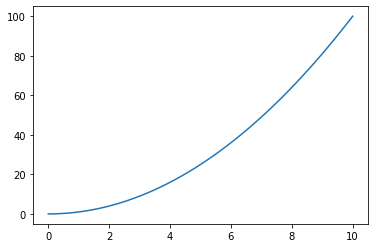

In [131]:
fig,ax = plt.subplots()
ax.plot(x,x**2)

## Use same data to make scatter plot

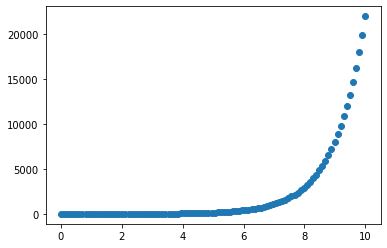

In [132]:
fig, ax = plt.subplots()
ax.scatter(x,np.exp(x))

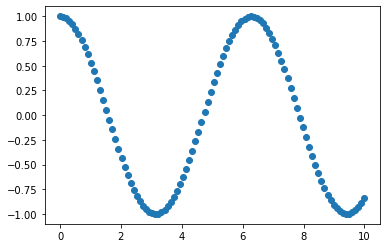

In [133]:
# Another scatter
fig, ax = plt.subplots()
ax.scatter(x,np.cos(x))

## make plot from dictionary

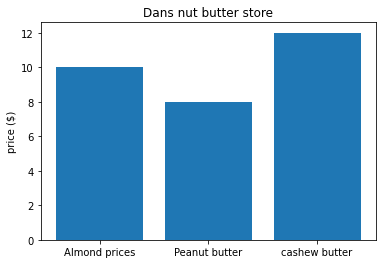

In [134]:
nut_butter_prices = {"Almond prices":10,"Peanut butter": 8,
                     "cashew butter":12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax.set(title="Dans nut butter store",ylabel="price ($)");

<BarContainer object of 3 artists>

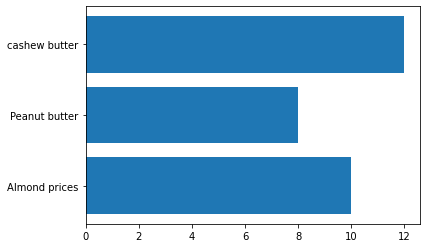

In [135]:
 fig, ax = plt.subplots()
 ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()))

#Making a histogram

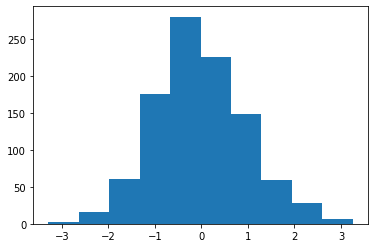

In [136]:
# Making some data for histogram
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

# Two option for subplots

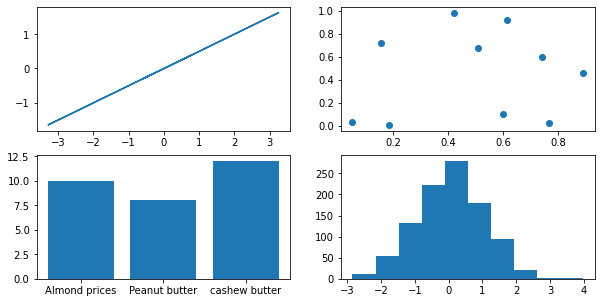

In [137]:
# Subplot option 1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,5))

# Plot to each different axis
ax1.plot(x,x/2)
ax2.scatter(np.random.random(10),np.random.random(10))
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax4.hist(np.random.randn(1000));


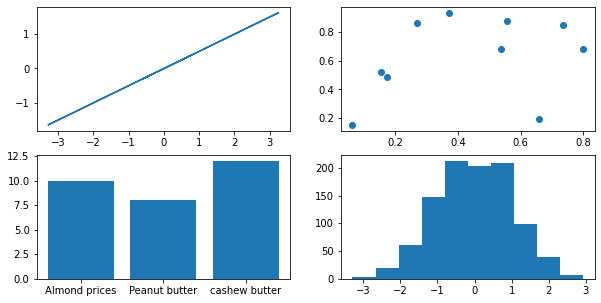

In [138]:
# Subplot option 2
fig, ax= plt.subplots(nrows=2,ncols=2,figsize=(10,5))

# plot to each axis index
ax[0,0].plot(x,x/2)
ax[0,1].scatter(np.random.random(10),np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000));


In [139]:
# Plotting from pandas DataFrames

In [140]:
import pandas as pd

In [141]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


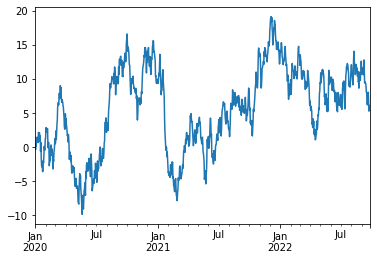

In [142]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2020",periods=1000))
ts = ts.cumsum() # Return cumulative sum over a dataframe or series axis
ts.plot()

In [143]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [144]:
car_sales["Price"] = car_sales["Price"].replace('[\$\,\.]', '', regex=True).astype('str')
car_sales.head(1)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000


In [145]:
type(car_sales["Price"][0])

str

In [146]:
# remove last 2 zeros
car_sales["Price"] = car_sales["Price"].str[:-2]


In [147]:
car_sales["Sale Date"] = pd.date_range("1/1/2020",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [148]:
car_sales["Total sales"] = car_sales["Price"].astype(int).cumsum() # Cumulatively addes as date goes on
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [149]:
# Making price column a int
car_sales["Price"]=car_sales["Price"].astype(int)

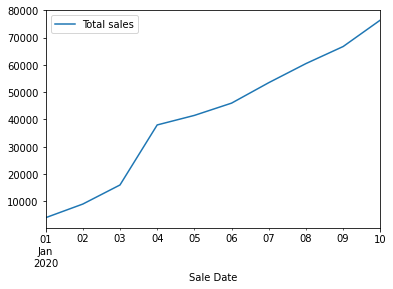

In [150]:
# Lets plot total sales
car_sales.plot(x="Sale Date",y="Total sales");

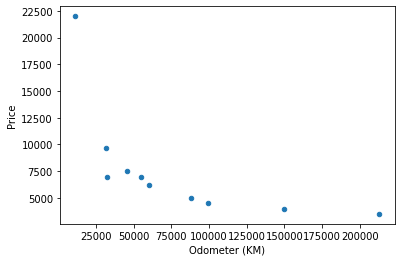

In [151]:
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

In [152]:
# How about a bar graph
x = np.random.rand(10,4)
x

# Turn it into a datafram
df = pd.DataFrame(x,columns=["a","b","c","d"])
df

,a,b,c,d
0,0.735322,0.252473,0.822454,0.122455
1,0.681090,0.646963,0.136165,0.687645
2,0.628738,0.230660,0.383450,0.412988
3,0.346210,0.600393,0.516808,0.849247
4,0.774021,0.791377,0.823906,0.603433
5,0.077573,0.627704,0.530616,0.615694
6,0.799298,0.730103,0.399296,0.415701
7,0.503518,0.412195,0.051044,0.873764
8,0.623424,0.179010,0.838621,0.280117
9,0.067952,0.227307,0.082131,0.293432


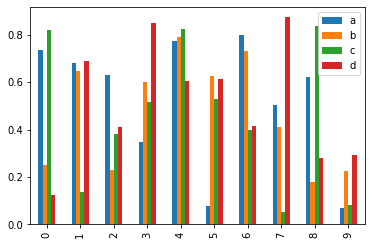

In [153]:
df.plot.bar(); # can use kind=bar

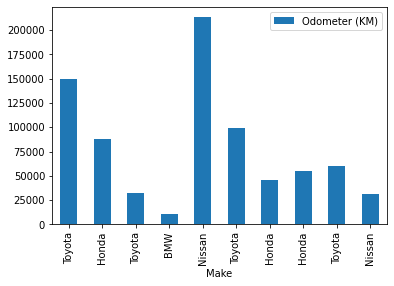

In [154]:
car_sales.plot.bar(x="Make",y="Odometer (KM)");

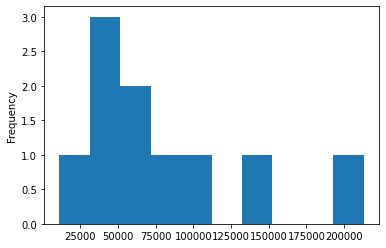

In [155]:
# How about histograms
car_sales["Odometer (KM)"].plot.hist()

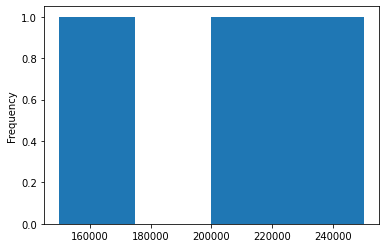

In [156]:
car_sales["Odometer (KM)"].plot.hist(bins=[150000,175000,200000,250000])


In [157]:
# Lets try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


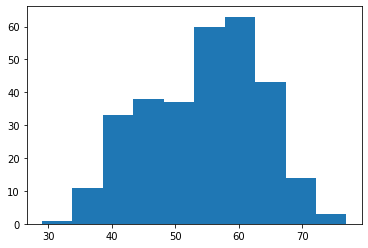

In [158]:
# Create histogram of age column
plt.hist(heart_disease["age"]);

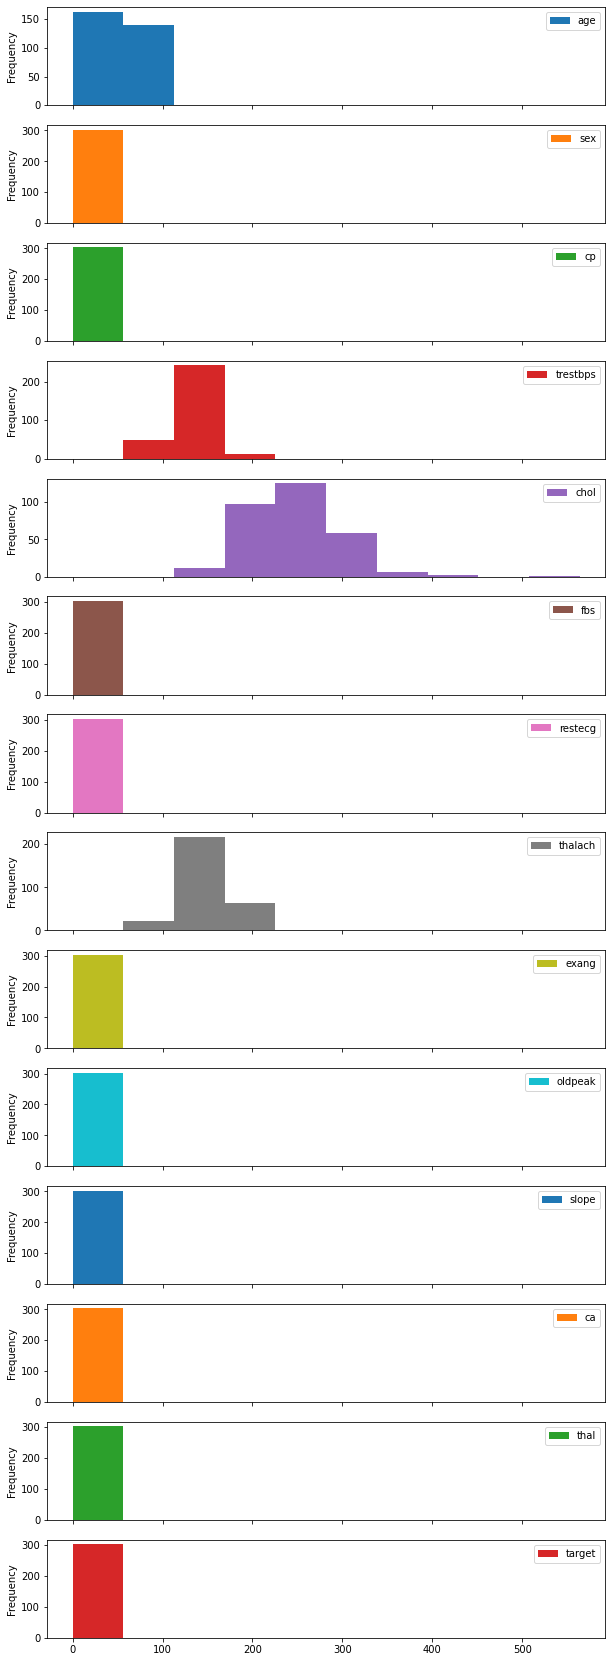

In [159]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

## WHICH ONE SHOULD YOU USE? Pyplot or matplotlib OO method
* When plotting something quickly, okay to use pyplot method
* When plotting advanced, use OO method

In [160]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


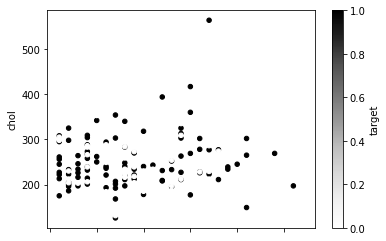

In [162]:
# Pyplot method
over_50.plot(kind="scatter",x="age",y="chol",c="target")

[(45.0, 100.0), Text(0.5, 1.0, 'age against chol')]

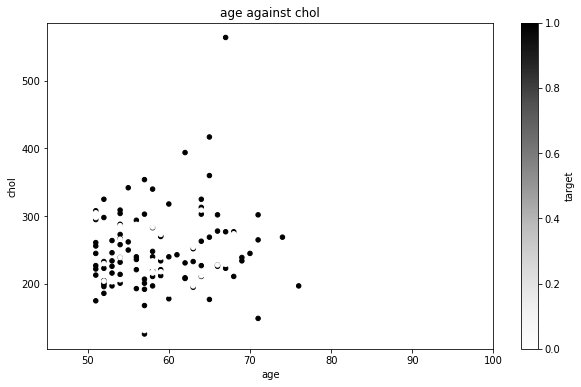

In [163]:
# OO kinda method mixed with pyplot
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",x="age",y="chol",c="target",ax=ax);
ax.set(xlim=([45,100]),title="age against chol")


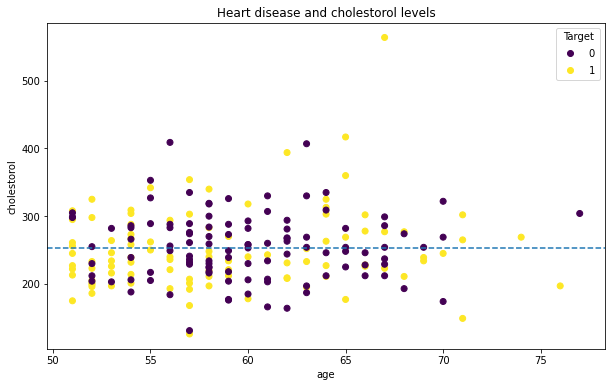

In [164]:
# OO method from sctach
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x=over_50["age"],y=over_50["chol"],c=over_50["target"]);

# customise
ax.set(title="Heart disease and cholestorol levels",xlabel="age", ylabel="cholestorol")

# add alegend
ax.legend(*scatter.legend_elements(),title="Target");

# add a horizontal line
ax.axhline(over_50["chol"].mean(),linestyle="--")

In [165]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


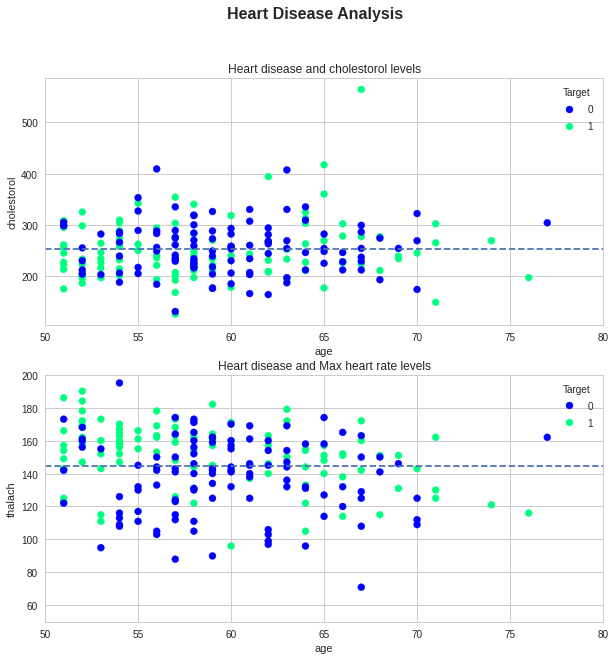

In [197]:
# set the style
plt.style.use("seaborn-whitegrid")

# Subplot of chol,age, thalach
fig,(ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# add data to ax0
# plot the data
scatter = ax0.scatter(x=over_50["age"],y=over_50["chol"],c=over_50["target"],cmap="winter");

# Customise ax0 axis
ax0.set_xlim([50,80]) # change x axis limits

# customise
ax0.set(title="Heart disease and cholestorol levels",xlabel="age", ylabel="cholestorol")

# add alegend
ax0.legend(*scatter.legend_elements(),title="Target");

# add a horizontal line
ax0.axhline(over_50["chol"].mean(),linestyle="--")

# add data to ax1
# plot the data
scatter = ax1.scatter(x=over_50["age"],y=over_50["thalach"],c=over_50["target"],cmap="winter");

# Customise ax1 axis
ax1.set_xlim([50,80]) # change x axis limits
ax1.set_ylim([50,200]) # change y axis limits


# customise
ax1.set(title="Heart disease and Max heart rate levels",xlabel="age", ylabel="thalach")

# add alegend
ax1.legend(*scatter.legend_elements(),title="Target");

# add a horizontal line
ax1.axhline(over_50["thalach"].mean(),linestyle="--")

# Add a super title
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

# Customising matplotlib plots 

In [167]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [168]:
car_sales["Price"].head()

0     4000
1     5000
2     7000
3    22000
4     3500
Name: Price, dtype: int64

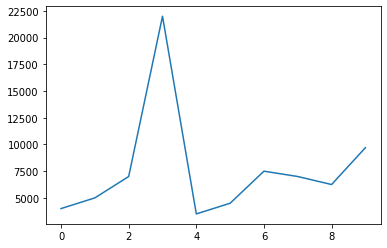

In [169]:
car_sales["Price"].plot()

In [170]:
plt.style.use("seaborn-whitegrid")

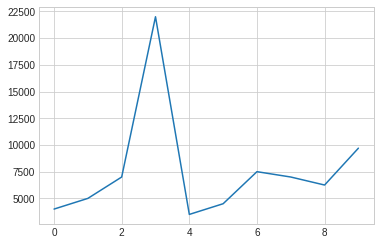

In [171]:
car_sales["Price"].plot()


In [172]:
plt.style.use("seaborn")

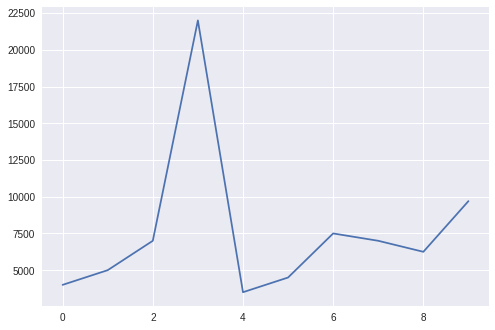

In [174]:
car_sales["Price"].plot()

In [176]:
# Create some data
x= np.random.randn(10,4)
df = pd.DataFrame(x,columns=["a","b","c","d"])
df

,a,b,c,d
0,1.488035,0.047735,-0.064508,-3.173423
1,-0.945382,0.218040,0.556378,0.142944
2,0.458539,-0.799124,0.808498,1.086119
3,-0.973872,0.840726,2.656315,-0.111172
4,0.508250,0.244209,-0.278078,-2.162804
5,-0.244274,-1.266234,0.055723,0.217028
6,1.328453,0.125382,1.089341,-0.276078
7,2.152825,0.037388,0.319986,0.425598
8,-1.327245,-1.004902,-0.794299,1.935434
9,-2.160817,-1.400324,-0.221076,0.029499


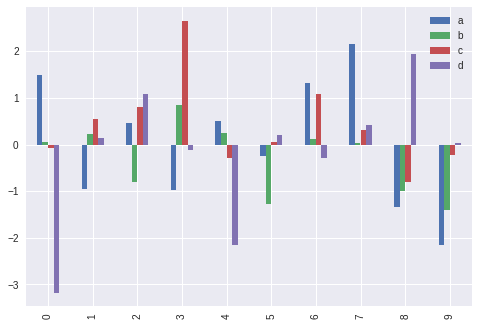

In [178]:
ax = df.plot(kind="bar")

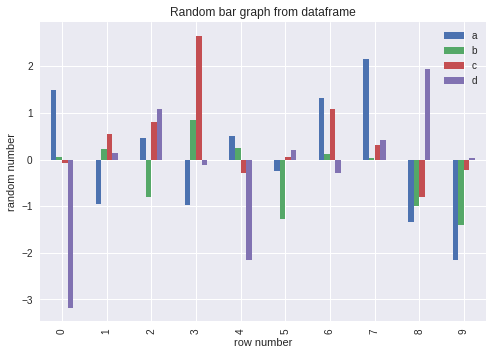

In [182]:
# customse our plot with set() method
ax = df.plot(kind="bar")
ax.set(title="Random bar graph from dataframe",xlabel="row number",ylabel="random number")
ax.legend().set_visible(True)

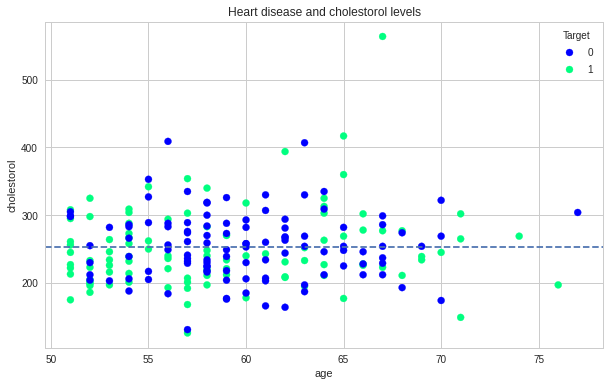

In [188]:
# set the style
plt.style.use("seaborn-whitegrid")

# OO method from sctach
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x=over_50["age"],y=over_50["chol"],c=over_50["target"],cmap="winter"); # CMAP CHANGES COLOR SCHEME

# customise
ax.set(title="Heart disease and cholestorol levels",xlabel="age", ylabel="cholestorol")

# add alegend
ax.legend(*scatter.legend_elements(),title="Target");

# add a horizontal line
ax.axhline(over_50["chol"].mean(),linestyle="--")

In [199]:
# save the graph
fig.savefig("heart-disease-analysis-plot-saved-with-code.png")